### File Reading and Basics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Demand Forecast\Historical Product Demand.csv')

In [12]:
df.sample(5)

,ProductCode,Warehouse,ProductCategory,Date,OrderDemand
1018236,Product_1226,Whse_J,Category_019,2016/9/8,200
467103,Product_0071,Whse_J,Category_019,2014/3/24,6000
1035522,Product_0346,Whse_J,Category_021,2016/3/25,1
170606,Product_1429,Whse_J,Category_019,2012/7/31,100
178297,Product_1017,Whse_J,Category_007,2012/1/20,50


In [8]:
# rename the columns
df.rename(columns = {'Product_Code': 'ProductCode',
                       'Product_Category': 'ProductCategory', 
                       'Order_Demand': 'OrderDemand'}, inplace = True)
df.head()

,ProductCode,Warehouse,ProductCategory,Date,OrderDemand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   ProductCode      1048575 non-null  object
 1   Warehouse        1048575 non-null  object
 2   ProductCategory  1048575 non-null  object
 3   Date             1037336 non-null  object
 4   OrderDemand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [17]:
#Need to change the date to a date datatype from an object
df['Date'] = pd.to_datetime(df['Date'])
df['OrderDemand'] = pd.to_numeric(df['OrderDemand'], errors='coerce')

In [13]:
df.describe()

,ProductCode,Warehouse,ProductCategory,Date,OrderDemand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [10]:
# check for null data
df.isnull().sum()

ProductCode            0
Warehouse              0
ProductCategory        0
Date               11239
OrderDemand            0
dtype: int64

In [18]:
# Find the minimum and maximum dates
min_date = df['Date'].min()
max_date = df['Date'].max()

print(f"The earliest date is: {min_date}")
print(f"The latest date is: {max_date}")

The earliest date is: 2011-01-08 00:00:00
The latest date is: 2017-01-09 00:00:00


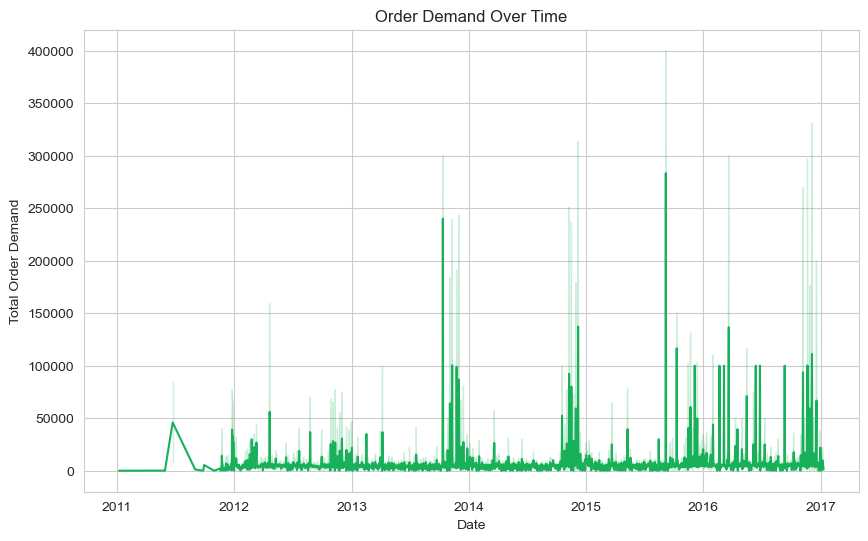

In [20]:
#Plot the whole dataset
sns.set_style("whitegrid") #Set the style
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='OrderDemand', color = '#18B15A')
plt.title('Order Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Total Order Demand')
plt.show()

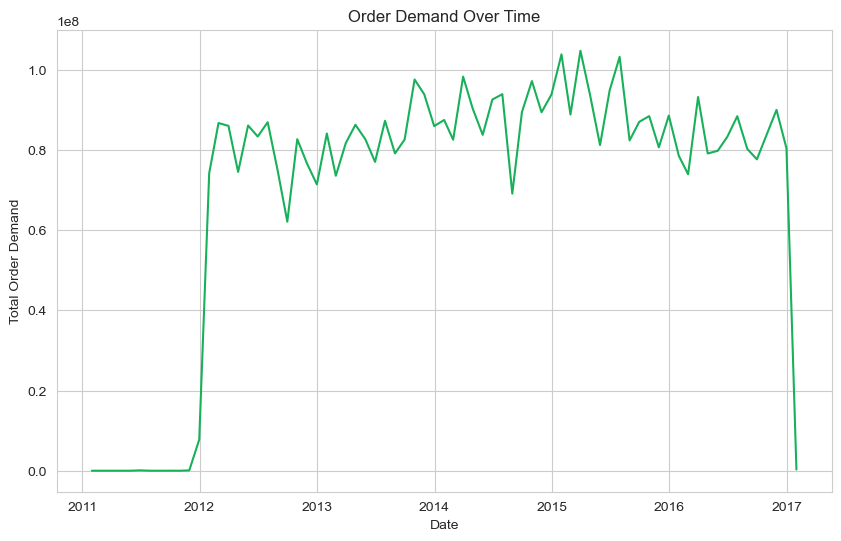

In [21]:
demand_df_group = df.groupby(pd.Grouper(key='Date', freq='M'))['OrderDemand'].sum().reset_index()

#Plot the new dataset for monthly inspection
sns.set_style("whitegrid") #Set the style
plt.figure(figsize=(10, 6))
sns.lineplot(data=demand_df_group, x='Date', y='OrderDemand', color = '#18B15A')
plt.title('Order Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Total Order Demand')
plt.show()

In [22]:
#we notice that any dates prior to 2012 are going irrelevant. We can remove these values
df = df[df['Date']>'2011-12-31']

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


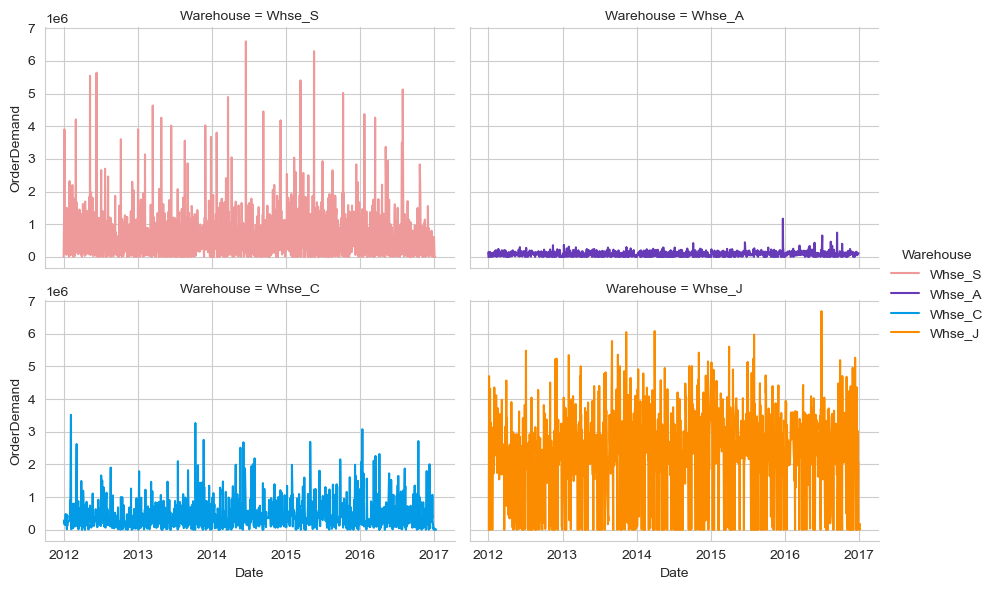

In [23]:
#Lets see what this looks like grouped by warehouse
demand_df_group_warehouse = df.groupby(['Date', 'Warehouse'])['OrderDemand'].sum().reset_index()

g = sns.relplot(data=demand_df_group_warehouse, 
                x='Date', 
                y='OrderDemand', 
                kind="line",
                hue='Warehouse',
                palette=["#EF9A9A", "#673AB7", "#039BE5", "#FB8C00"],
                col='Warehouse',  # Facet by 'Warehouse'
                col_wrap=2,  
                height=3, aspect=1.5)
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036696 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ProductCode      1036696 non-null  object        
 1   Warehouse        1036696 non-null  object        
 2   ProductCategory  1036696 non-null  object        
 3   Date             1036696 non-null  datetime64[ns]
 4   OrderDemand      1030837 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 47.5+ MB


In [25]:
# Find the new minimum and maximum dates
min_date = df['Date'].min()
max_date = df['Date'].max()

print(f"The earliest date is: {min_date}")
print(f"The latest date is: {max_date}")

The earliest date is: 2012-01-01 00:00:00
The latest date is: 2017-01-09 00:00:00


In [27]:
df.sample(7)

,ProductCode,Warehouse,ProductCategory,Date,OrderDemand
981484,Product_1054,Whse_A,Category_024,2016-08-03,1.0
881613,Product_0940,Whse_J,Category_005,2016-05-31,100.0
379429,Product_1516,Whse_J,Category_019,2013-09-02,700.0
916790,Product_0011,Whse_J,Category_005,2016-11-28,200.0
826371,Product_1892,Whse_J,Category_021,2015-06-01,1.0
126869,Product_1445,Whse_A,Category_019,2012-10-29,0.0
1046221,Product_0975,Whse_J,Category_028,2016-07-15,300.0


In [29]:
# Find unique values for each column
unique_product_codes_count = df['ProductCode'].nunique()
unique_warehouses_count = df['Warehouse'].nunique()
unique_product_categories_count = df['ProductCategory'].nunique()

print(f"Unique Product Codes: {unique_product_codes_count}")
print(f"Unique Warehouses: {unique_warehouses_count}")
print(f"Unique Product Categories: {unique_product_categories_count}")

Unique Product Codes: 2160
Unique Warehouses: 4
Unique Product Categories: 33


## ABC analysis of the product categories

Category A items: Top 80% of the total order demand.
Category B items: Next 15% of the total order demand.
Category C items: Remaining 5% of the total order demand.

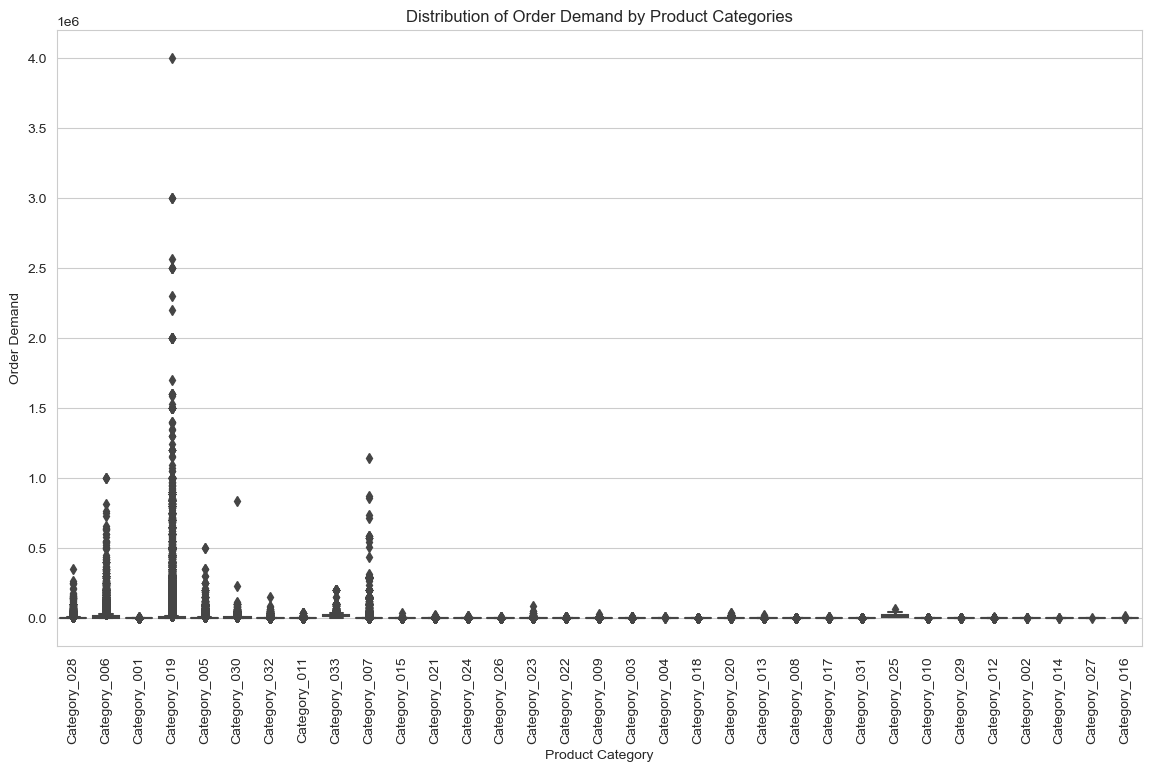

In [50]:
# Plotting the distribution of order demand by product categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='ProductCategory', y='OrderDemand', data=df)
plt.title('Distribution of Order Demand by Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Order Demand')
plt.xticks(rotation=90)
plt.show()

In [56]:
# Calculate total order demand by product category
category_demand = df.groupby('ProductCategory')['OrderDemand'].sum().reset_index()

# Calculate the total order demand
total_demand = category_demand['OrderDemand'].sum()

# Calculate the demand percentage for each category
category_demand['Demand_Percentage'] = (category_demand['OrderDemand'] / total_demand) * 100

# Sort product categories by total order demand in descending order
category_demand = category_demand.sort_values(by='OrderDemand', ascending=False)

# Display the dataframe
category_demand.head()

,ProductCategory,OrderDemand,Demand_Percentage
18,Category_019,4.223456e+09,82.633394
5,Category_006,4.031850e+08,7.888456
4,Category_005,1.983456e+08,3.880700
6,Category_007,1.281808e+08,2.507903
27,Category_028,4.805427e+07,0.940199


In [57]:
category_demand

,ProductCategory,OrderDemand,Demand_Percentage
18,Category_019,4.223456e+09,82.633394
5,Category_006,4.031850e+08,7.888456
4,Category_005,1.983456e+08,3.880700
6,Category_007,1.281808e+08,2.507903
27,Category_028,4.805427e+07,0.940199
32,Category_033,4.249000e+07,0.831332
29,Category_030,4.026296e+07,0.787759
31,Category_032,4.438464e+06,0.086840
20,Category_021,4.406380e+06,0.086212
8,Category_009,3.694371e+06,0.072282


In [62]:
# Define Category B products
category_b_products = ['Category_006', 'Category_005', 'Category_007', 'Category_028', 'Category_033', 'Category_030']

# Assign ABC categories based on domain knowledge
def assign_abc_category(row):
    if row['ProductCategory'] == 'Category_019':
        return 'A'
    elif row['ProductCategory'] in category_b_products:
        return 'B'
    else:
        return 'C'

category_demand['ABC_Category'] = category_demand.apply(assign_abc_category, axis=1)

In [63]:
category_demand.head(10)

,ProductCategory,OrderDemand,Demand_Percentage,ABC_Category
18,Category_019,4.223456e+09,82.633394,A
5,Category_006,4.031850e+08,7.888456,B
4,Category_005,1.983456e+08,3.880700,B
6,Category_007,1.281808e+08,2.507903,B
27,Category_028,4.805427e+07,0.940199,B
32,Category_033,4.249000e+07,0.831332,B
29,Category_030,4.026296e+07,0.787759,B
31,Category_032,4.438464e+06,0.086840,C
20,Category_021,4.406380e+06,0.086212,C
8,Category_009,3.694371e+06,0.072282,C


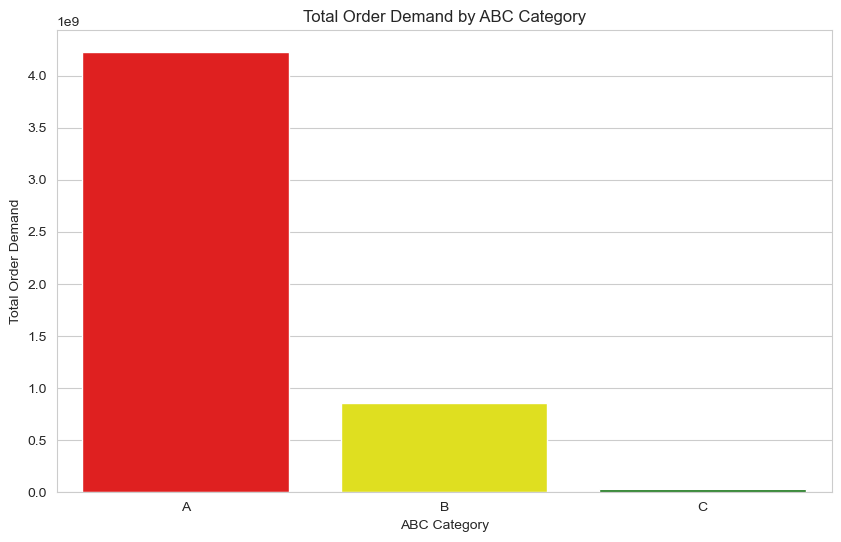

In [65]:
# Group by ABC_Category and sum the OrderDemand
abc_summary = category_demand.groupby('ABC_Category')['OrderDemand'].sum().reset_index()

# Plotting the ABC categories
plt.figure(figsize=(10, 6))
sns.barplot(x='ABC_Category', y='OrderDemand', data=abc_summary, palette={'A':'red', 'B':'yellow', 'C':'green'})
plt.title('Total Order Demand by ABC Category')
plt.xlabel('ABC Category')
plt.ylabel('Total Order Demand')
plt.show()

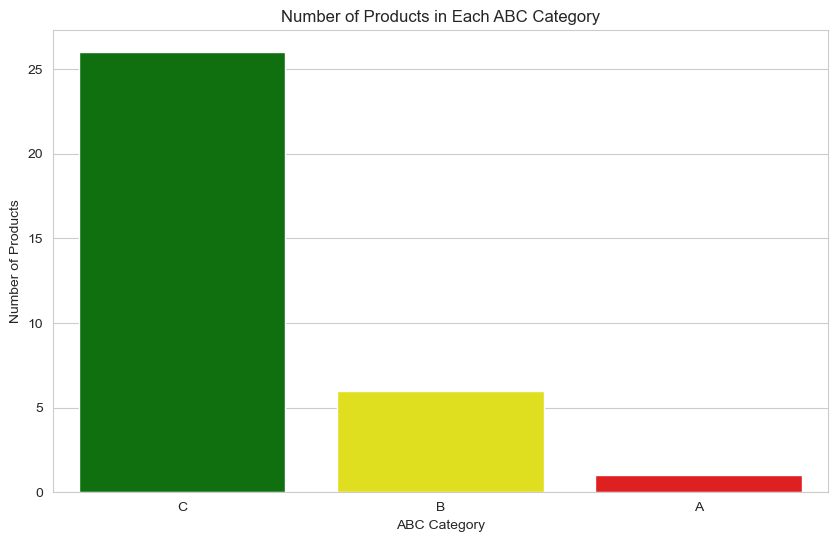

In [66]:
# Count the number of products in each ABC category
abc_counts = category_demand['ABC_Category'].value_counts().reset_index()
abc_counts.columns = ['ABC_Category', 'Count']

# Plotting the number of products in each ABC category
plt.figure(figsize=(10, 6))
sns.barplot(x='ABC_Category', y='Count', data=abc_counts, palette={'A':'red', 'B':'yellow', 'C':'green'})
plt.title('Number of Products in Each ABC Category')
plt.xlabel('ABC Category')
plt.ylabel('Number of Products')
plt.show()

## Demand Forecasting

In [68]:
df.sample(5)

,ProductCode,Warehouse,ProductCategory,Date,OrderDemand
681350,Product_1456,Whse_J,Category_019,2015-07-03,700.0
79201,Product_0721,Whse_J,Category_001,2012-09-20,2.0
483730,Product_1558,Whse_C,Category_019,2014-04-14,500.0
256244,Product_0712,Whse_J,Category_001,2013-07-11,3.0
497793,Product_1427,Whse_J,Category_019,2014-07-30,500.0


In [70]:
# Aggregate data to monthly order demand for each warehouse
monthly_demand = df.groupby(['Warehouse', pd.Grouper(key='Date', freq='M')])['OrderDemand'].sum().reset_index()

In [71]:
monthly_demand.head()

,Warehouse,Date,OrderDemand
0,Whse_A,2012-01-31,1920092.0
1,Whse_A,2012-02-29,2543423.0
2,Whse_A,2012-03-31,2343061.0
3,Whse_A,2012-04-30,1947054.0
4,Whse_A,2012-05-31,2681003.0


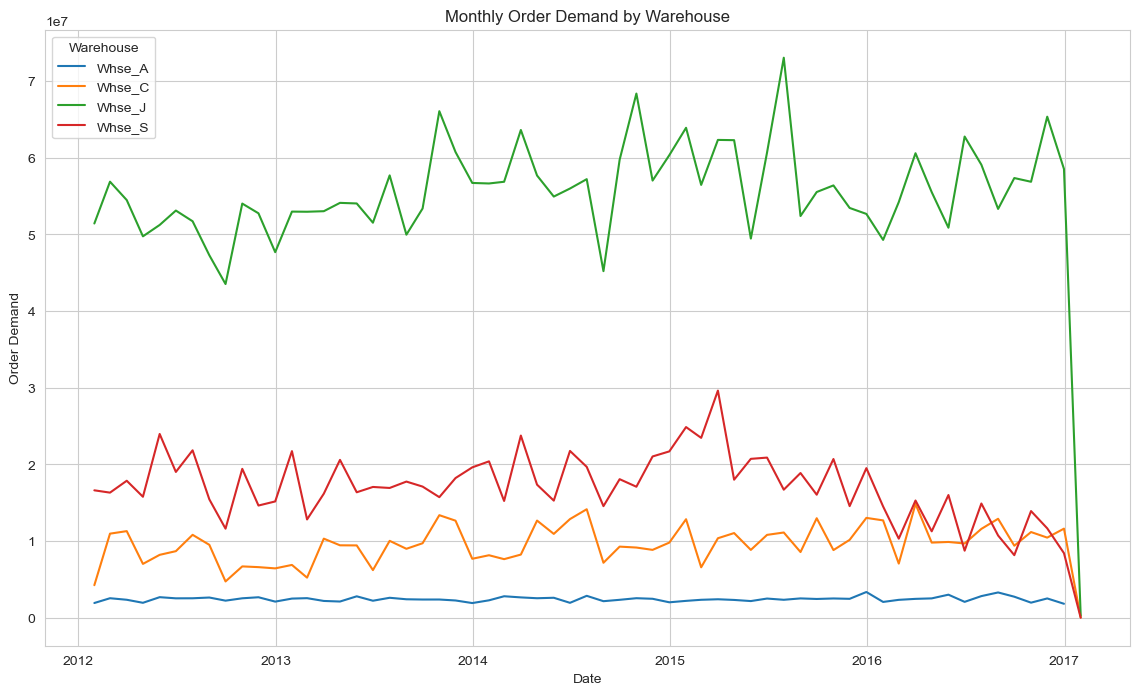

In [72]:
# Plot the data
plt.figure(figsize=(14, 8))

# Loop through each warehouse and plot its time series data
for warehouse in monthly_demand['Warehouse'].unique():
    warehouse_data = monthly_demand[monthly_demand['Warehouse'] == warehouse]
    plt.plot(warehouse_data['Date'], warehouse_data['OrderDemand'], label=warehouse)

plt.title('Monthly Order Demand by Warehouse')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend(title='Warehouse')
plt.show()

### Warehouse S

In [73]:
# Filter the data for warehouse 'Whse_S'
whse_s_data = df[df['Warehouse'] == 'Whse_S']

In [75]:
# Drop rows with missing values in 'Date' and 'Order_Demand'
whse_s_data = whse_s_data.dropna(subset=['Date', 'OrderDemand'])

# Aggregate data to monthly order demand
monthly_demand_whse_s = whse_s_data.groupby(pd.Grouper(key='Date', freq='M'))['OrderDemand'].sum().reset_index()

In [77]:
whse_s_data.head(5)

,ProductCode,Warehouse,ProductCategory,Date,OrderDemand
215,Product_1994,Whse_S,Category_019,2012-11-23,3000.0
216,Product_0558,Whse_S,Category_030,2012-08-20,5000.0
217,Product_0560,Whse_S,Category_030,2012-08-20,15000.0
218,Product_0561,Whse_S,Category_030,2012-10-08,2000.0
219,Product_1994,Whse_S,Category_019,2012-01-16,100.0


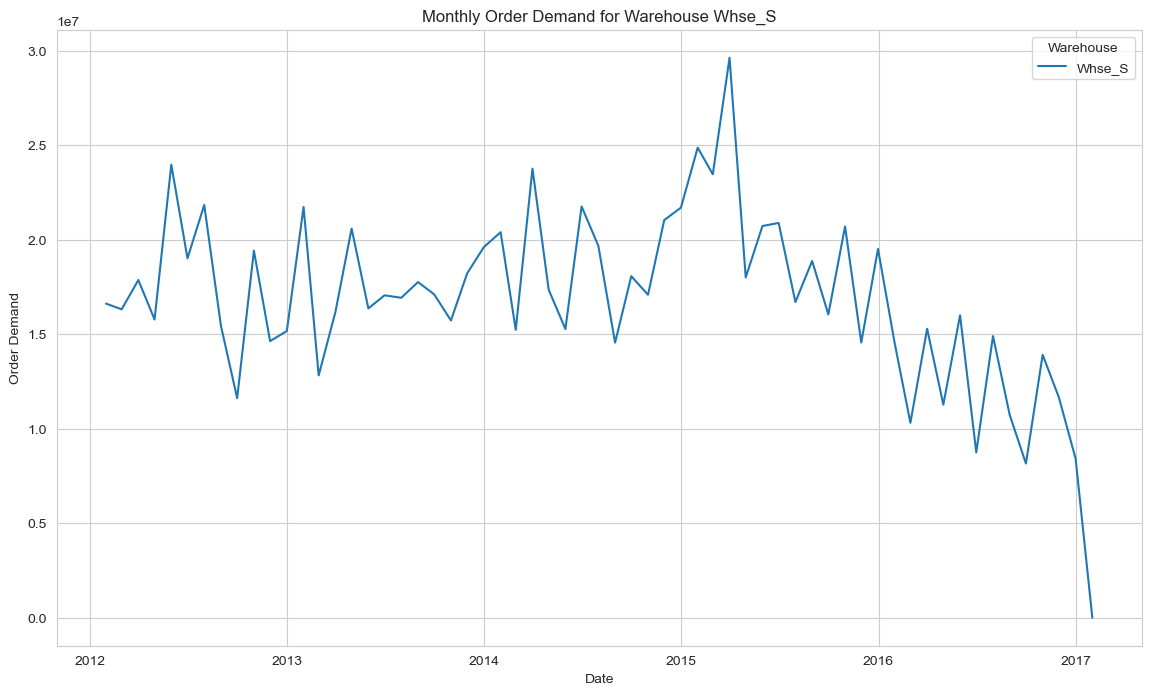

In [79]:
# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(monthly_demand_whse_s['Date'], monthly_demand_whse_s['OrderDemand'], label='Whse_S')
plt.title('Monthly Order Demand for Warehouse Whse_S')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend(title='Warehouse')
plt.show()

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

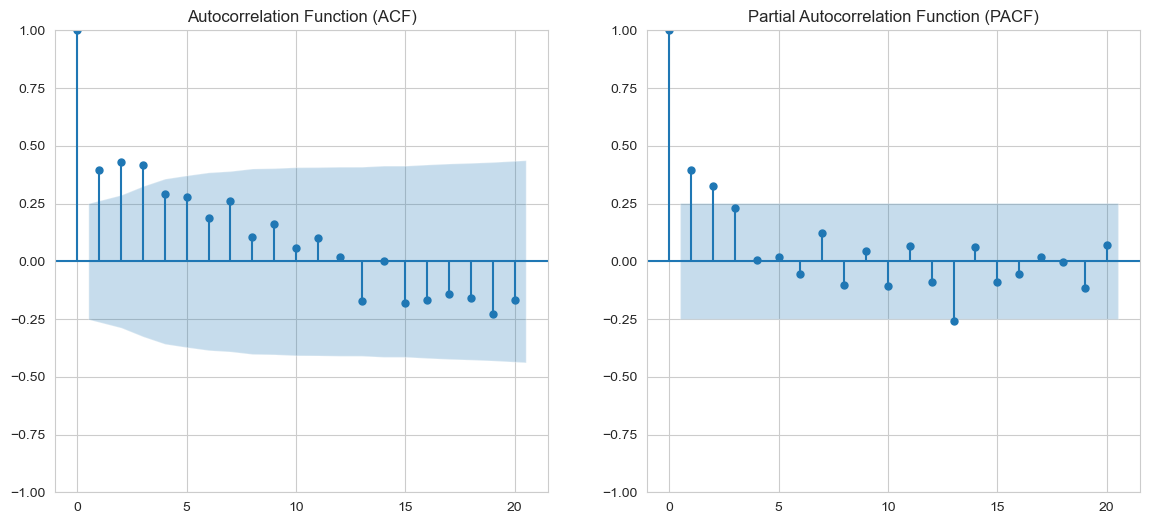

In [83]:
# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(121)
plot_acf(monthly_demand_whse_s['OrderDemand'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(monthly_demand_whse_s['OrderDemand'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

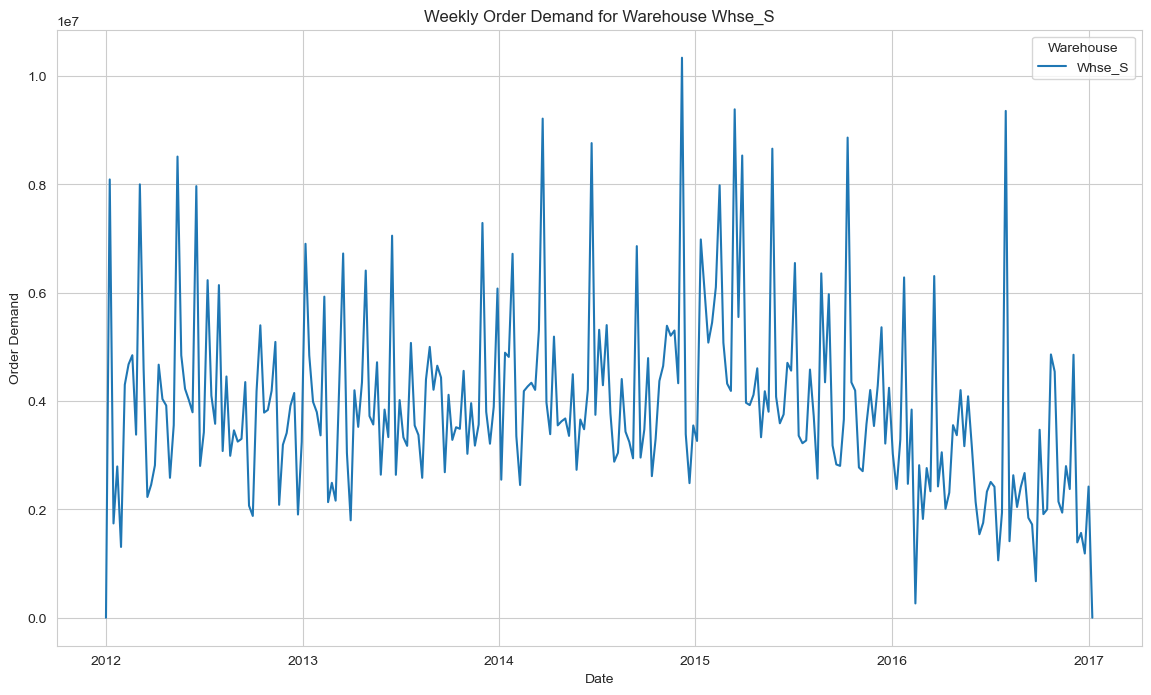

In [80]:
# Aggregate data to weekly order demand
weekly_demand_whse_s = whse_s_data.groupby(pd.Grouper(key='Date', freq='W'))['OrderDemand'].sum().reset_index()

# Plot the weekly demand data
plt.figure(figsize=(14, 8))
plt.plot(weekly_demand_whse_s['Date'], weekly_demand_whse_s['OrderDemand'], label='Whse_S')
plt.title('Weekly Order Demand for Warehouse Whse_S')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend(title='Warehouse')
plt.show()

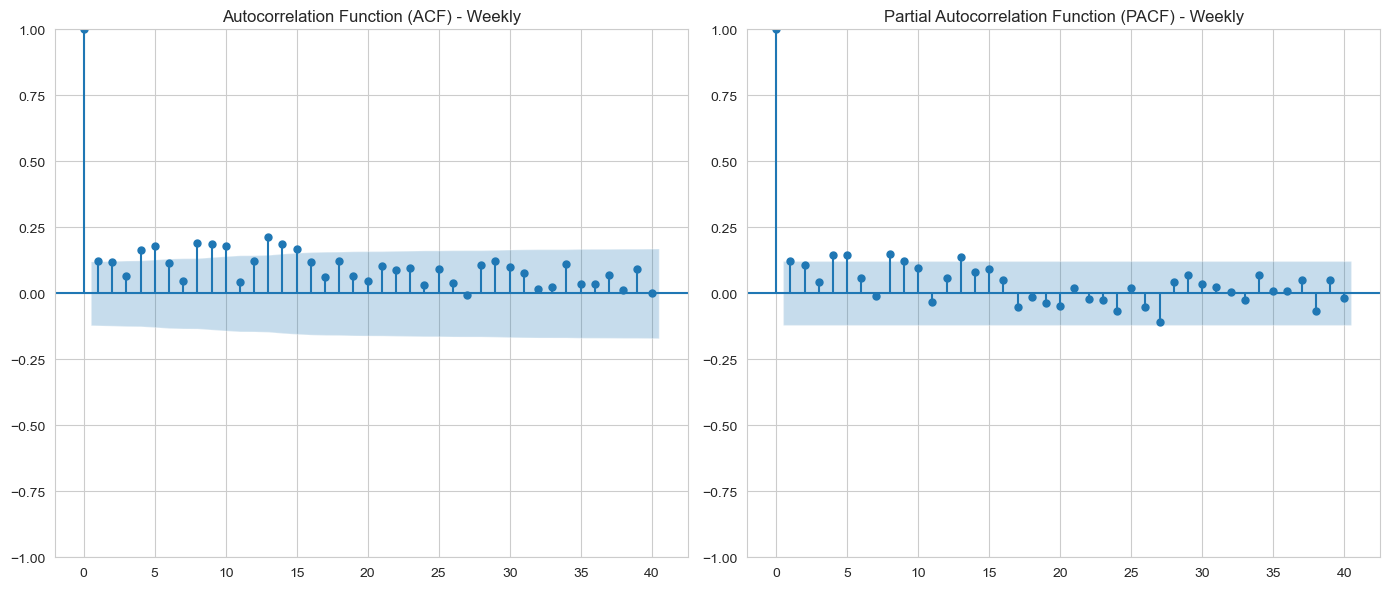

In [81]:
# Plot ACF and PACF for weekly data
plt.figure(figsize=(14, 6))

plt.subplot(121)
plot_acf(weekly_demand_whse_s['OrderDemand'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Weekly')

plt.subplot(122)
plot_pacf(weekly_demand_whse_s['OrderDemand'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Weekly')

plt.tight_layout()
plt.show()

In [84]:
# Create lag features
for lag in range(1, 5):
    weekly_demand_whse_s[f'Lag_{lag}'] = weekly_demand_whse_s['OrderDemand'].shift(lag)

# Drop rows with NaN values resulting from lag creation
weekly_demand_whse_s = weekly_demand_whse_s.dropna().reset_index(drop=True)

# Display the first few rows of the dataset with lag features
weekly_demand_whse_s.head()

,Date,OrderDemand,Lag_1,Lag_2,Lag_3,Lag_4
0,2012-01-29,1306687.0,2793081.0,1740936.0,8091791.0,2.0
1,2012-02-05,4301975.0,1306687.0,2793081.0,1740936.0,8091791.0
2,2012-02-12,4677977.0,4301975.0,1306687.0,2793081.0,1740936.0
3,2012-02-19,4846509.0,4677977.0,4301975.0,1306687.0,2793081.0
4,2012-02-26,3380264.0,4846509.0,4677977.0,4301975.0,1306687.0


In [85]:
# Define the features (lags) and target (OrderDemand)
features = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4']
target = 'OrderDemand'

# Define the split point (e.g., 80% training, 20% testing)
split_ratio = 0.8
split_point = int(len(weekly_demand_whse_s) * split_ratio)

# Split the data into training and testing sets
train = weekly_demand_whse_s.iloc[:split_point]
test = weekly_demand_whse_s.iloc[split_point:]

# Separate features and target for training and testing sets
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Display the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (207, 4)
y_train shape: (207,)
X_test shape: (52, 4)
y_test shape: (52,)


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}')

Random Forest - MSE: 4702726454615.693, MAE: 1871827.5740384613, RMSE: 2168577.057569247


In [87]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f'XGBoost - MSE: {mse_xgb}, MAE: {mae_xgb}, RMSE: {rmse_xgb}')


XGBoost - MSE: 5013747751972.809, MAE: 1810393.6754807692, RMSE: 2239139.9581028447


In [88]:
import lightgbm as lgb

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the LightGBM model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)

print(f'LightGBM - MSE: {mse_lgb}, MAE: {mae_lgb}, RMSE: {rmse_lgb}')


LightGBM - MSE: 5951455532342.217, MAE: 2133177.841649221, RMSE: 2439560.520327835


C:\Users\Admin\AppData\Local\Temp\ipykernel_2096\631287230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_RF'] = y_pred_rf
C:\Users\Admin\AppData\Local\Temp\ipykernel_2096\631287230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_XGB'] = y_pred_xgb
C:\Users\Admin\AppData\Local\Temp\ipykernel_2096\631287230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

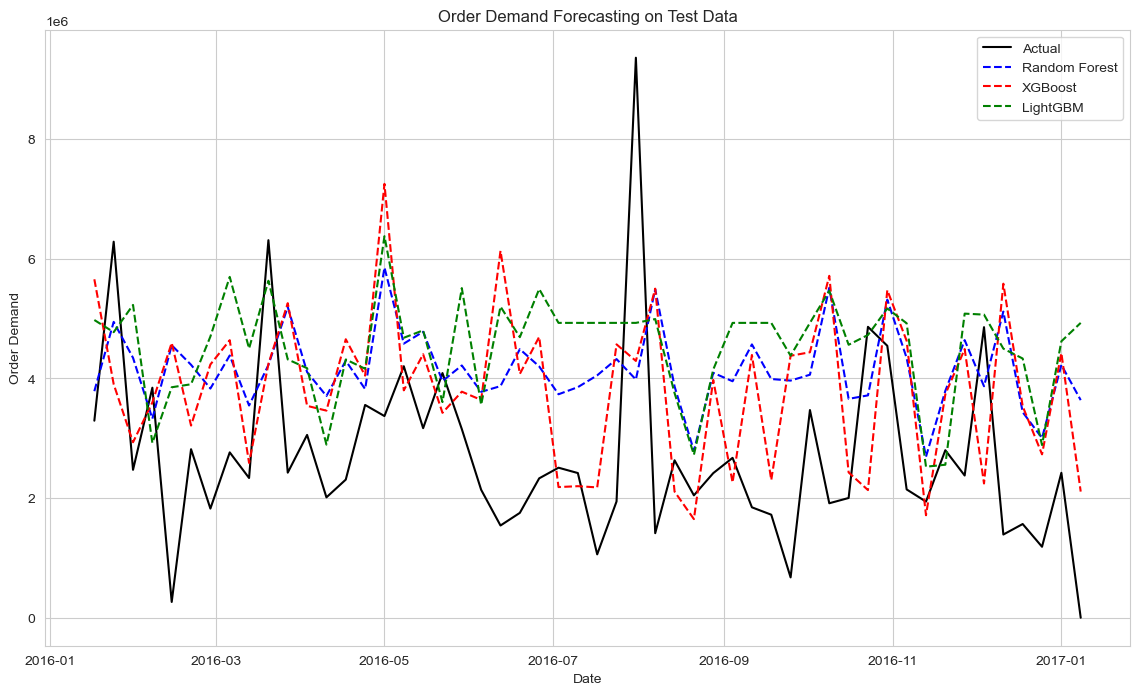

In [90]:
# Add predictions to the test set
test['Pred_RF'] = y_pred_rf
test['Pred_XGB'] = y_pred_xgb
test['Pred_LGB'] = y_pred_lgb

# Combine train and test for plotting
combined = pd.concat([train, test], sort=False)

# Plot the forecasts on the test data
plt.figure(figsize=(14, 8))
plt.plot(test['Date'], test['OrderDemand'], label='Actual', color='black')
plt.plot(test['Date'], test['Pred_RF'], label='Random Forest', linestyle='--', color='blue')
plt.plot(test['Date'], test['Pred_XGB'], label='XGBoost', linestyle='--', color='red')
plt.plot(test['Date'], test['Pred_LGB'], label='LightGBM', linestyle='--', color='green')
plt.title('Order Demand Forecasting on Test Data')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend()
plt.show()

In [91]:
# Display the metrics for comparison
metrics = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'MSE': [mse_rf, mse_xgb, mse_lgb],
    'MAE': [mae_rf, mae_xgb, mae_lgb],
    'RMSE': [rmse_rf, rmse_xgb, rmse_lgb]
})

print(metrics)

           Model           MSE           MAE          RMSE
0  Random Forest  4.702726e+12  1.871828e+06  2.168577e+06
1        XGBoost  5.013748e+12  1.810394e+06  2.239140e+06
2       LightGBM  5.951456e+12  2.133178e+06  2.439561e+06


### Hyper Parameter tuning of Random Forest

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
276 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\lib\site-packa

Best parameters found: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Random Forest - MSE: 4878001477851.931, MAE: 1926043.5435057995, RMSE: 2208619.812881323


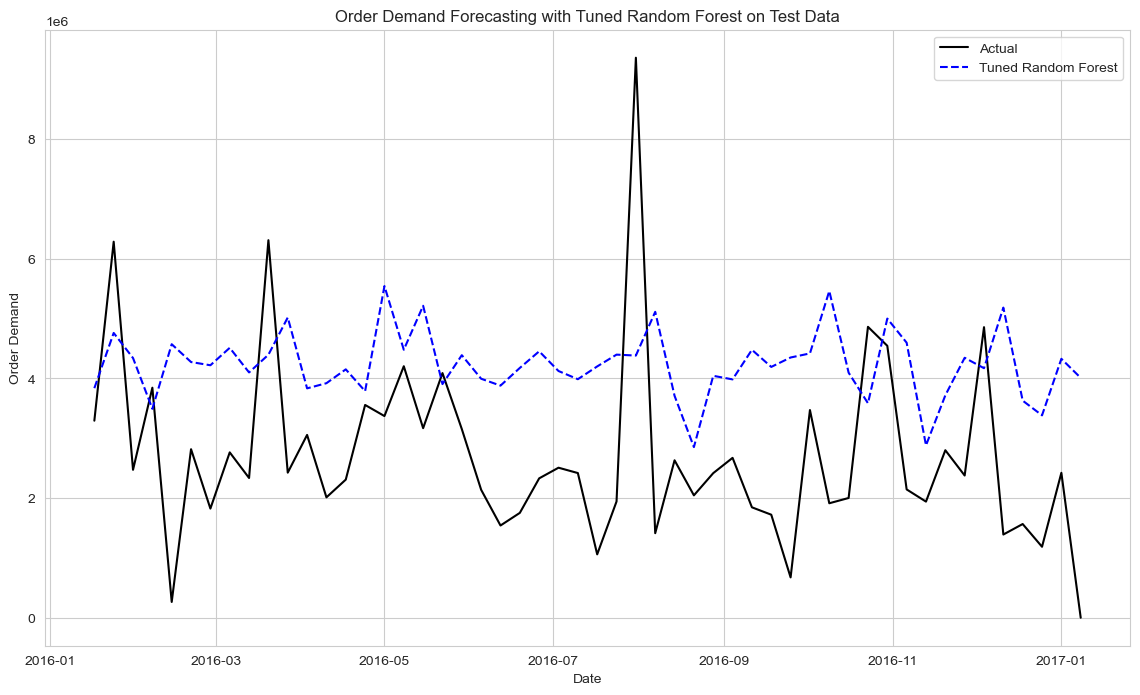

In [92]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)

print(f'Tuned Random Forest - MSE: {mse_best_rf}, MAE: {mae_best_rf}, RMSE: {rmse_best_rf}')

# Plot the forecasts on the test data
plt.figure(figsize=(14, 8))
plt.plot(test['Date'], test['OrderDemand'], label='Actual', color='black')
plt.plot(test['Date'], y_pred_best_rf, label='Tuned Random Forest', linestyle='--', color='blue')
plt.title('Order Demand Forecasting with Tuned Random Forest on Test Data')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend()
plt.show()